## Estadística Aplicada

3er Parcial

Nombre: David Eduardo Gómez Marín    -    Matrícula: 1914352

Gpo 41


In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [202]:
##Especializadas
#Librerías especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_predict
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#estimar modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

##
import pmdarima as pm
plt.rcParams["figure.figsize"] = (10, 6)

In [203]:
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv',index_col='mes', parse_dates=True)

C:\Users\Gamer User\AppData\Local\Temp\ipykernel_15344\4259561833.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv',index_col='mes', parse_dates=True)


Muestre de que tipo son las variables del dataframe, revise que no haya missing values (de haberlos imputar valores). Cersiorarse que exista una variable fecha, que sea el index y tenga una frecuencia asignada (1.8 puntos)

In [204]:
pasajeros

,miles de pasajeros,ingresos (miles de pesos)
mes,,
1995-01-01,3439.000,3240.000
1995-02-01,2879.000,3623.000
1995-03-01,3103.000,3990.000
1995-04-01,3491.000,3321.000
1995-05-01,3109.000,3777.000
...,...,...
2023-04-01,9523.669,38799.657
2023-05-01,11891.646,58511.798
2023-06-01,10657.712,55684.063


In [205]:
pasajeros.isnull().sum()

miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

In [206]:
pasajeros = pasajeros.asfreq('MS')

In [207]:
pasajeros.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq='MS')

2. Análisis exploratorio. Utilizando código de Python genera un print() para cada una de la siguiente información (8 puntos):
a) Rango de fechas

In [208]:
print('La primer fecha de la base de datos es ', pasajeros.index.min(), 'y la última fecha de la base de datos es ', pasajeros.index.max())

La primer fecha de la base de datos es  1995-01-01 00:00:00 y la última fecha de la base de datos es  2023-08-01 00:00:00


b) Número de observaciones

In [209]:
print('Hay un total de', pasajeros.count()[0], 'observaciones en la base de datos')

Hay un total de 344 observaciones en la base de datos


c) Valor mínimo y valor máximo del número de pasajeros

In [210]:
print('El valor mínimo de pasajeros es', pasajeros['miles de pasajeros'].min(), 'y el número máximo de pasajeros es', pasajeros['miles de pasajeros'].max())

El valor mínimo de pasajeros es 2397.0 y el número máximo de pasajeros es 17534.523


3. Grafica lo siguiente2 (8.2 puntos):

a) La serie de miles de pasajeros

Text(0.5, 0, 'Meses')

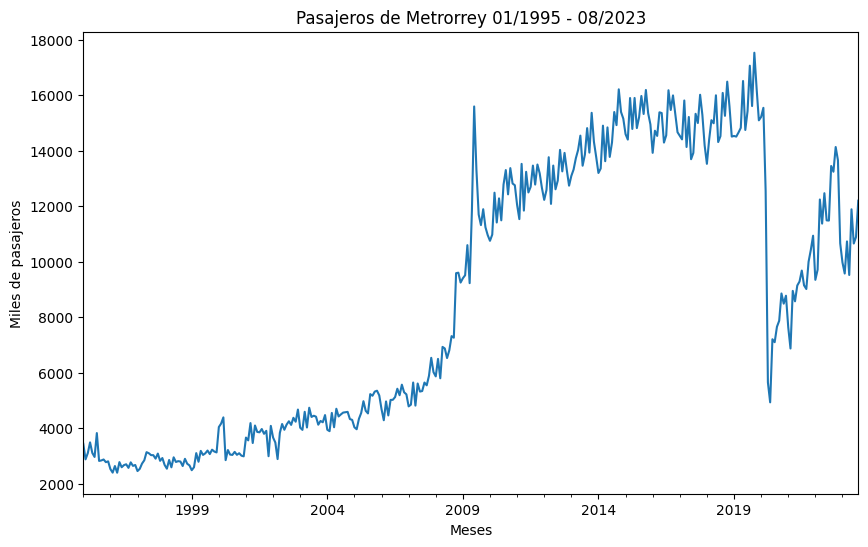

In [211]:
pasajeros['miles de pasajeros'].plot()
plt.title('Pasajeros de Metrorrey 01/1995 - 08/2023')
plt.ylabel('Miles de pasajeros')
plt.xlabel('Meses')

b) Una media móvil centrada a 7 meses, y explica si la serie tiene tendencia o no, y si existen ciclos (subidas y caídas) y que se debe cada uno.

In [212]:
pasajeros['PMC-7'] = pasajeros['miles de pasajeros'].rolling(11, center=True).mean()

Text(0.5, 0, 'Meses')

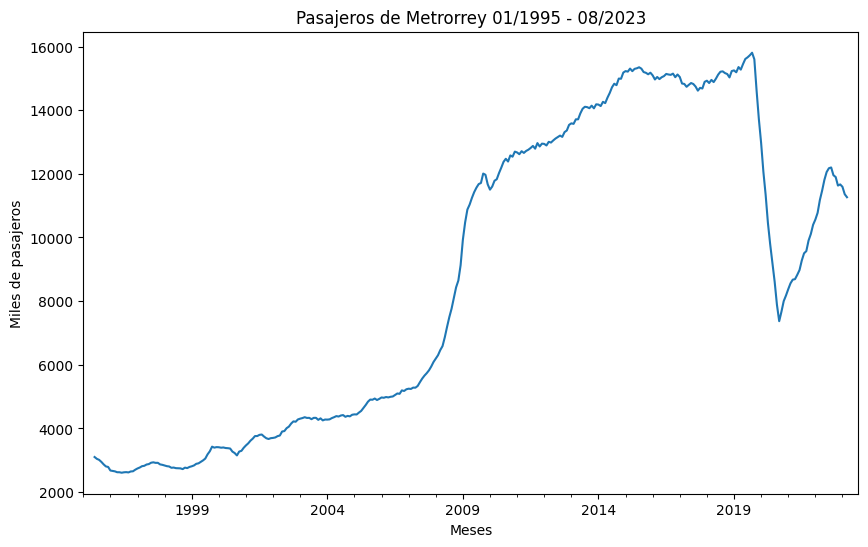

In [213]:
#pasajeros['miles de pasajeros'].plot()
pasajeros['PMC-7'].plot()
plt.title('Pasajeros de Metrorrey 01/1995 - 08/2023')
plt.ylabel('Miles de pasajeros')
plt.xlabel('Meses')

La tendencia de los miles de pasajeros es una tendencia positiva desde el año 1995 hasta principios del año 2020, en donde empieza  una tendencia negativa y existe una gran caída en los miles de pasajeros por mes, ya que empieza una cuarentena a nivel mundial debido a la pandemia del COVID-19. Por último, a mediados del 2021, existe una subida en los miles de pasajeros y vuelve a comenzar una tendencia positiva ya que se empezaron a reactivar las actividades no escenciales en el país y se levantaron las restricciones impuestas por la cuarentena.

4. El director de Metrorrey planea hacer mantenimiento a las estaciones y los 
vagones, pero no sabe la fecha adecuada para hacerlo. Utiliza el modelo ETS 
para obtener el componente estacional de la serie y señala el mes o meses 
adecuados para dar mantenimiento (8.2 puntos).

In [214]:
ets1 = seasonal_decompose(pasajeros['miles de pasajeros'], model='mul')

In [215]:
ets1.seasonal.head(28)

mes
1995-01-01    0.954408
1995-02-01    0.950919
1995-03-01    1.031340
1995-04-01    0.938619
1995-05-01    1.028585
1995-06-01    0.986927
1995-07-01    1.003497
1995-08-01    1.034753
1995-09-01    0.995570
1995-10-01    1.062610
1995-11-01    1.014896
1995-12-01    0.997875
1996-01-01    0.954408
1996-02-01    0.950919
1996-03-01    1.031340
1996-04-01    0.938619
1996-05-01    1.028585
1996-06-01    0.986927
1996-07-01    1.003497
1996-08-01    1.034753
1996-09-01    0.995570
1996-10-01    1.062610
1996-11-01    1.014896
1996-12-01    0.997875
1997-01-01    0.954408
1997-02-01    0.950919
1997-03-01    1.031340
1997-04-01    0.938619
Freq: MS, Name: seasonal, dtype: float64

<Axes: xlabel='mes'>

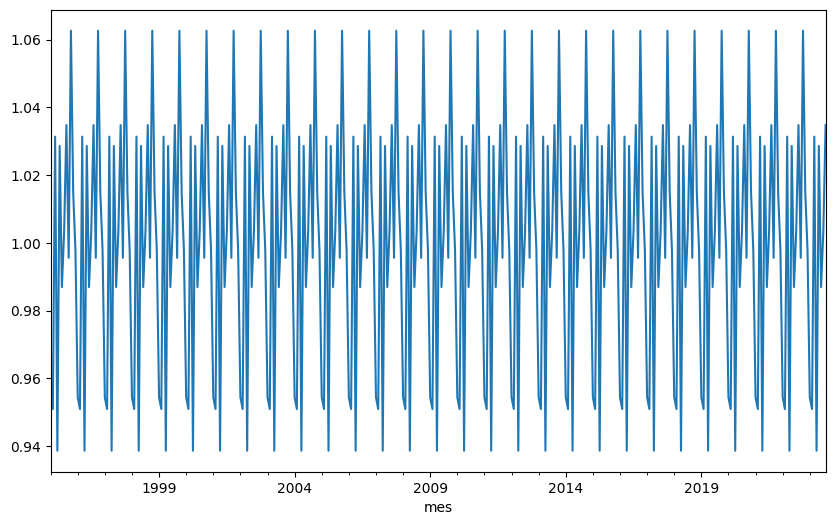

In [216]:
ets1.seasonal.plot()

In [217]:
mejoresMesesParaMantenimiento = pd.DataFrame(ets1.seasonal<0.96)

In [218]:
mejoresMesesParaMantenimiento

,seasonal
mes,
1995-01-01,True
1995-02-01,True
1995-03-01,False
1995-04-01,True
1995-05-01,False
...,...
2023-04-01,True
2023-05-01,False
2023-06-01,False


Los mejores meses para mantenimiento de los vagones son los meses de Enero, Febrero y Abril ya que hay menos usuarios.

5. El director de Metrorrey quiere saber los ingresos por pasaje y el número de 
pasajeros los siguientes 5 meses. Utiliza el método de Holt-Winters para 
pronosticar el número de pasajeros los próximos 5 meses, cada pronóstico 
multiplícalo por $7.1 para tener un estimado de los ingresos (8.2 puntos).

In [219]:
holtwinters_model = ExponentialSmoothing(pasajeros['miles de pasajeros'], trend='mul', seasonal='mul',seasonal_periods=12).fit()
pronostico_5meses = holtwinters_model.forecast(36)

c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [220]:
pronosticoProx5Meses = pd.DataFrame(pronostico_5meses)

In [221]:
pronosticoProx5Meses.columns = ['Miles de pasajeros']
pronosticoProx5Meses

,Miles de pasajeros
2023-09-01,11552.427481
2023-10-01,12209.852476
2023-11-01,11483.302480
2023-12-01,10782.870453
2024-01-01,10391.563182
2024-02-01,10612.385630
2024-03-01,11697.577561
2024-04-01,10417.721742
2024-05-01,11596.540893
2024-06-01,11580.473117


In [222]:
ingresos = pd.DataFrame(pronosticoProx5Meses['Miles de pasajeros'] * 7.1)
ingresos.columns = ['ingresos del mes']
ingresos

,ingresos del mes
2023-09-01,82022.235117
2023-10-01,86689.952583
2023-11-01,81531.447611
2023-12-01,76558.380218
2024-01-01,73780.098596
2024-02-01,75347.937975
2024-03-01,83052.800684
2024-04-01,73965.824368
2024-05-01,82335.440341
2024-06-01,82221.359128


6. Realiza un pronóstico de los miles de pasajeros con el modelo ARIMA 
cumpliendo los siguientes pasos:

a) Realiza una prueba de raíz unitaria a la serie original (8.2 puntos)


In [223]:
#Prueba de raíz unitaria
prueba_adf = adfuller(pasajeros['miles de pasajeros'])
pvalue = prueba_adf[1]
pvalue.round(2)

if pvalue < 0.05 :
    print('Los miles de pasajeros son una serie estacionaria')
else:
    print('Los miles de pasajeros son una serie No estacionaria')


Los miles de pasajeros son una serie No estacionaria


b) En caso de que no sea estacionaria aplica primeras diferencias, y realiza 
la prueba de raíz unitaria para verificar que la serie sea estacionaria (8.2 
puntos)


In [224]:
pasajeros['1rasDiff_MdP'] = pasajeros['miles de pasajeros'].diff()
prueba_adf1 = adfuller(pasajeros['1rasDiff_MdP'].dropna())
pvalue1 = prueba_adf1[1]
pvalue1.round(2)

if pvalue1 < 0.05 :
    print('Las 1ras diferencias son una serie estacionaria')
else:
    print('Las 1ras diferencias son una serie No estacionaria')


Las 1ras diferencias son una serie estacionaria


c) Si la serie no es estacionaria repite el paso b hasta que la serie sea 
estacionaria.

d) Realiza las graficas de autocorrelación de la serie estacionaria para 
verificar si la serie tiene o no un componente estacional (8.2 puntos)

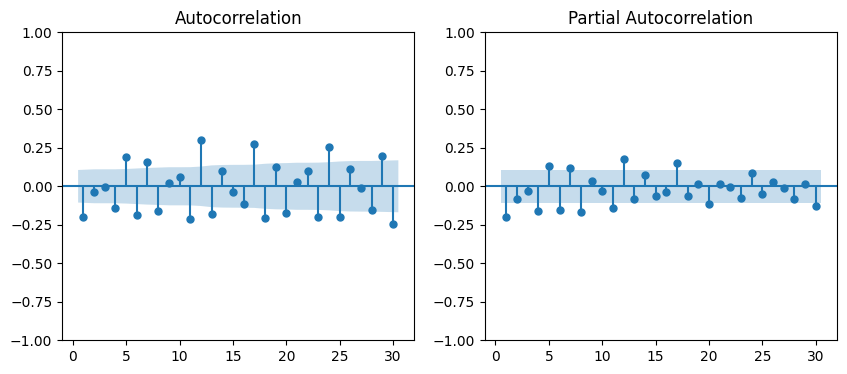

In [225]:
ig, ax = plt.subplots(1,2,figsize=(10,4))

#1er
plot_acf(pasajeros['1rasDiff_MdP'].dropna(), zero=False, lags=30, ax=ax[0])

#2da
plot_pacf(pasajeros['1rasDiff_MdP'].dropna(), zero=False, lags=30, ax=ax[1]);

La serie si cuenta con componente estacional.

e) Utiliza auto_arima para encontrar el orden del modelo arima, dando el 
parámetro information_criterion prueba y muestra el resultado, con aic, 
bic, hqic, oob, en caso de que resulten diferente elegir aic si tu matricula 
termina en par, sino termina en par elegir uno distinto a aic. (8.2 puntos)


In [226]:
### determinar 
pm.auto_arima(pasajeros['miles de pasajeros'],
              start_p=1,start_q=1,
              max_p=7,max_q=7,
              ic='aic',
              seasonal=True,#True pq es estacionario, a partir de aqui, los sig parametros se agregan debido a que la arima si es estacional
              m=12, #frecuencia de los datos
              start_P=1, start_Q=1,
              max_P=7, max_Q=7
              )

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [227]:
### determinar 
pm.auto_arima(pasajeros['miles de pasajeros'],
              start_p=1,start_q=1,
              max_p=7,max_q=7,
              ic='bic',
              seasonal=True,#True pq es estacionario, a partir de aqui, los sig parametros se agregan debido a que la arima si es estacional
              m=12, #frecuencia de los datos
              start_P=1, start_Q=1,
              max_P=7, max_Q=7
              )

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [228]:
### determinar 
pm.auto_arima(pasajeros['miles de pasajeros'],
              start_p=1,start_q=1,
              max_p=7,max_q=7,
              ic='hqic',
              seasonal=True,#True pq es estacionario, a partir de aqui, los sig parametros se agregan debido a que la arima si es estacional
              m=12, #frecuencia de los datos
              start_P=1, start_Q=1,
              max_P=7, max_Q=7
              )

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [229]:
### determinar 
pm.auto_arima(pasajeros['miles de pasajeros'],
              start_p=1,start_q=1,
              max_p=7,max_q=7,
              ic='oob',
              seasonal=True,#True pq es estacionario, a partir de aqui, los sig parametros se agregan debido a que la arima si es estacional
              m=12, #frecuencia de los datos
              start_P=1, start_Q=1,
              max_P=7, max_Q=7
              )

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

autoarima nos sugiere SARIMA(1,1,3)(1,0,1,12)

f) Con el orden del modelo arima obtenido estima el modelo arima (8.2 
puntos)

In [230]:
## Estimar modelo
model = ARIMA(pasajeros['miles de pasajeros'],
              order=(1,1,3),
              seasonal_order=(1,0,1,12))
results = model.fit()
print(results.summary())

c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(1, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -2772.716
Date:                            Sat, 04 Nov 2023   AIC                           5559.433
Time:                                    18:06:13   BIC                           5586.297
Sample:                                01-01-1995   HQIC                          5570.134
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9508      0.037    -25.528      0.000      -1.024      -0.878
ma.L1          0.9126      0.050   

c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


g) Realiza la gráfica del pronóstico a 5 meses con los intervalos de confianza 
y la serie original desde 2021 (8.2 puntos)


In [231]:
pasajeros.tail()

,miles de pasajeros,ingresos (miles de pesos),PMC-7,1rasDiff_MdP
mes,,,,
2023-04-01,9523.669,38799.657,NaN,-1210.233
2023-05-01,11891.646,58511.798,NaN,2367.977
2023-06-01,10657.712,55684.063,NaN,-1233.934
2023-07-01,10894.497,56378.304,NaN,236.785
2023-08-01,12201.982,57821.901,NaN,1307.485


Text(0, 0.5, 'Miles de pasajeros')

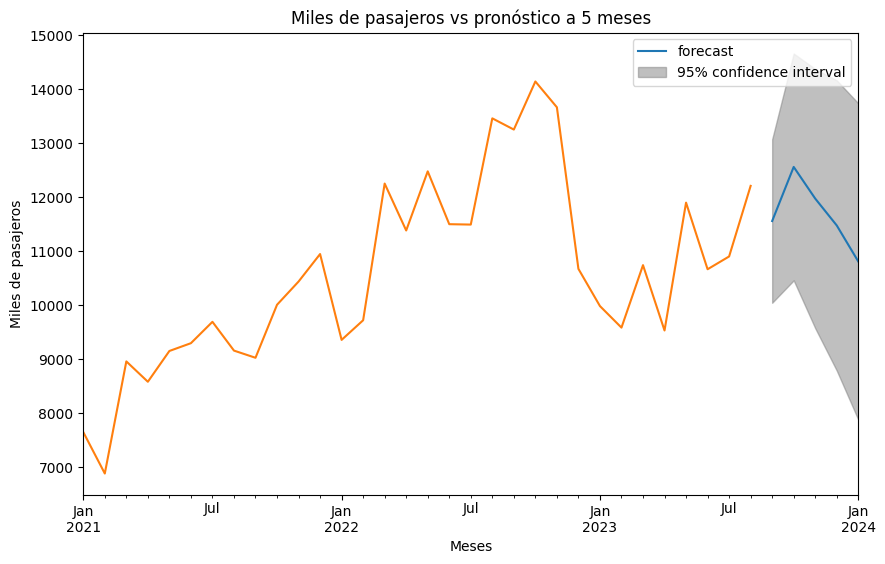

In [232]:
#Grafica
plot_predict(results,'2023-09-01', '2024-01-01')
pasajeros['miles de pasajeros']['2021':].plot(figsize=(10,6))
plt.title('Miles de pasajeros vs pronóstico a 5 meses')
plt.xlabel('Meses')
plt.ylabel('Miles de pasajeros')

h) Realiza el pronostico a 5 meses con los intervalos de confianza (8.2 
puntos)

In [233]:
forecast = results.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [234]:
inicio = '2023-09-01'
fin = '2024-01-01'

In [235]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]

In [236]:
df_forecast = pd.DataFrame({
    'pronostico': pronostico_valor,
    'limite inf': pronostico_intervalos['lower miles de pasajeros'],
    'limite sup': pronostico_intervalos['upper miles de pasajeros']
})

In [237]:
df_forecast

,pronostico,limite inf,limite sup
2023-09-01,11550.767744,10036.862482,13064.673007
2023-10-01,12552.862921,10452.326416,14653.399426
2023-11-01,11966.538314,9565.883914,14367.192713
2023-12-01,11468.971711,8781.119154,14156.824267
2024-01-01,10801.939327,7872.642940,13731.235713


i) Calcula los ingresos y el intervalo de los ingreso multiplicando por $7.1
(8.2 puntos)

In [238]:
df_forecast2 = pd.DataFrame({
    'ingresos': pronostico_valor * 7.1,
    'limite inf': pronostico_intervalos['lower miles de pasajeros'] * 7.1,
    'limite sup': pronostico_intervalos['upper miles de pasajeros'] * 7.1
})

In [239]:
df_forecast2

,ingresos,limite inf,limite sup
2023-09-01,82010.450985,71261.723622,92759.178348
2023-10-01,89125.326740,74211.517555,104039.135924
2023-11-01,84962.422026,67917.775790,102007.068263
2023-12-01,81429.699148,62345.945997,100513.452299
2024-01-01,76693.769219,55895.764872,97491.773565
